Katie Briggs
Milestone 2
DSC540-301

Perform at least 5 data transformation and/or cleansing steps to your flat file data. For example:

Replace Headers
Format data into a more readable format
Identify outliers and bad data
Find duplicates
Fix casing or inconsistent values
Conduct Fuzzy Matching

In [74]:
# import needed libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [76]:
# read in flat file data

df = pd.read_csv("Quakes.csv")

In [77]:
# veiw top 5 rows
df.head()

,I_D,FLAG_TSUNAMI,YEAR,MONTH,DAY,HOUR,MINUTE,SECOND,FOCAL_DEPTH,EQ_PRIMARY,...,TOTAL_MISSING,TOTAL_MISSING_DESCRIPTION,TOTAL_INJURIES,TOTAL_INJURIES_DESCRIPTION,TOTAL_DAMAGE_MILLIONS_DOLLARS,TOTAL_DAMAGE_DESCRIPTION,TOTAL_HOUSES_DESTROYED,TOTAL_HOUSES_DESTROYED_DESCRIPTION,TOTAL_HOUSES_DAMAGED,TOTAL_HOUSES_DAMAGED_DESCRIPTION
0,5222,Yes,1990,2,8,7.0,15.0,32.2,26.0,6.6,...,NaN,NaN,300.0,3.0,0.9,1.0,NaN,NaN,600.0,3.0
1,6477,Yes,1990,2,20,6.0,53.0,39.8,14.0,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5223,No,1990,2,28,23.0,43.0,36.6,5.0,5.5,...,NaN,NaN,30.0,1.0,12.7,3.0,NaN,NaN,NaN,NaN
3,7709,No,1990,3,3,12.0,16.0,27.9,33.0,7.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5224,No,1990,3,4,19.0,46.0,19.6,10.0,6.1,...,NaN,NaN,40.0,1.0,1.0,2.0,NaN,NaN,NaN,3.0


In [25]:

df.shape

(1508, 47)

In [28]:
# Create smaller dataframe with the most important data
# Replace Headers
df_small = df[['YEAR','EQ_PRIMARY','FOCAL_DEPTH','INTENSITY', 'LOCATION_NAME', 'LATITUDE', 'LONGITUDE', 'FLAG_TSUNAMI']]
df_small

,YEAR,EQ_PRIMARY,FOCAL_DEPTH,INTENSITY,LOCATION_NAME,LATITUDE,LONGITUDE,FLAG_TSUNAMI
0,1990,6.6,26.0,7.0,"PHILIPPINES: BOHOL, CEBU, CAGAYAN DE ORO, CAM...",9.755,124.694,Yes
1,1990,6.4,14.0,NaN,JAPAN: NEAR S. COAST OF HONSHU,34.706,139.252,Yes
2,1990,5.5,5.0,7.0,"CALIFORNIA: S, CLAREMONT, COVINA",34.140,-117.700,No
3,1990,7.6,33.0,NaN,FIJI ISLANDS,-22.122,175.163,No
4,1990,6.1,10.0,NaN,"PAKISTAN: KALAT, QUETTA, MASTUNG",28.925,66.331,No
...,...,...,...,...,...,...,...,...
1503,2020,5.3,10.0,NaN,CHINA: QINGHAI PROVINCE,33.124,98.916,No
1504,2020,6.6,17.0,7.0,GREECE: CRETE,34.205,25.712,Yes
1505,2020,4.6,10.0,NaN,"IRAN: TEHRAN, DAMAVAND",35.725,52.044,No
1506,2020,5.2,10.0,NaN,CHINA: YUNNAN PROVINCE: QIAOJIA,27.296,103.281,No


In [30]:
# identify null or missing values
df_small.style.highlight_null(null_color='red')

,YEAR,EQ_PRIMARY,FOCAL_DEPTH,INTENSITY,LOCATION_NAME,LATITUDE,LONGITUDE,FLAG_TSUNAMI
0,1990,6.600000,26.000000,7.000000,"PHILIPPINES: BOHOL, CEBU, CAGAYAN DE ORO, CAMIGUIN",9.755000,124.694000,Yes
1,1990,6.400000,14.000000,nan,JAPAN: NEAR S. COAST OF HONSHU,34.706000,139.252000,Yes
2,1990,5.500000,5.000000,7.000000,"CALIFORNIA: S, CLAREMONT, COVINA",34.140000,-117.700000,No
3,1990,7.600000,33.000000,nan,FIJI ISLANDS,-22.122000,175.163000,No
4,1990,6.100000,10.000000,nan,"PAKISTAN: KALAT, QUETTA, MASTUNG",28.925000,66.331000,No
5,1990,7.000000,22.000000,8.000000,"COSTA RICA: PUNTARENAS, SAN JOSE",9.919000,-84.808000,Yes
6,1990,6.300000,33.000000,6.000000,TAJIKISTAN: PAMIR MOUNTAINS,37.034000,72.942000,No
7,1990,5.500000,39.000000,4.000000,PHILIPPINES: SANTIAGO,9.253000,125.606000,No
8,1990,4.700000,18.000000,6.000000,"UNITED KINGDOM: MANCHESTER, LIVERPOOL",52.314000,-2.985000,No
9,1990,7.500000,11.000000,4.000000,NORTHERN MARIANA ISLANDS: SAIPAN; GUAM,15.125000,147.596000,Yes


In [37]:
# Format data into a more readable format
# remove missing data

df_small.dropna()


,YEAR,EQ_PRIMARY,FOCAL_DEPTH,INTENSITY,LOCATION_NAME,LATITUDE,LONGITUDE,FLAG_TSUNAMI
0,1990,6.6,26.0,7.0,"PHILIPPINES: BOHOL, CEBU, CAGAYAN DE ORO, CAM...",9.755,124.694,Yes
2,1990,5.5,5.0,7.0,"CALIFORNIA: S, CLAREMONT, COVINA",34.140,-117.700,No
5,1990,7.0,22.0,8.0,"COSTA RICA: PUNTARENAS, SAN JOSE",9.919,-84.808,Yes
6,1990,6.3,33.0,6.0,TAJIKISTAN: PAMIR MOUNTAINS,37.034,72.942,No
7,1990,5.5,39.0,4.0,PHILIPPINES: SANTIAGO,9.253,125.606,No
...,...,...,...,...,...,...,...,...
1499,2020,5.0,23.0,8.0,"INDONESIA: JAVA: SUKABUMI, BOGOR",-6.808,106.676,No
1500,2020,5.7,12.0,6.0,UTAH,40.751,-112.078,No
1501,2020,5.4,10.0,8.0,BALKANS NW: CROATIA: ZAGREB,45.897,15.966,No
1502,2020,7.5,57.0,6.0,RUSSIA: KURIL ISLANDS,48.986,157.693,Yes


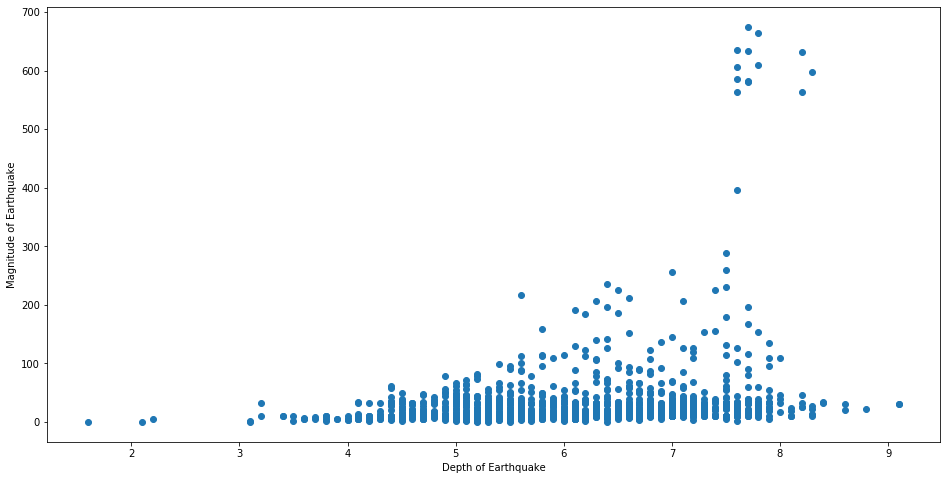

In [48]:
# identify outliers

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df_small['EQ_PRIMARY'], df_small['FOCAL_DEPTH'])
ax.set_xlabel('Depth of Earthquake')
ax.set_ylabel('Magnitude of Earthquake')
plt.show()

In [56]:
#calculate the IQR for each column in dataframe

Q1 = df_small.quantile(0.25)
Q3 = df_small.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

YEAR            12.00000
EQ_PRIMARY       1.50000
FOCAL_DEPTH     23.00000
INTENSITY        3.00000
LATITUDE        37.52350
LONGITUDE      107.58975
dtype: float64


In [57]:
print(df_small < (Q1 - 1.5 * IQR)) |(df_small > (Q3 + 1.5 * IQR))

      EQ_PRIMARY  FLAG_TSUNAMI  FOCAL_DEPTH  INTENSITY  LATITUDE  \
0          False         False        False      False     False   
1          False         False        False      False     False   
2          False         False        False      False     False   
3          False         False        False      False     False   
4          False         False        False      False     False   
...          ...           ...          ...        ...       ...   
1503       False         False        False      False     False   
1504       False         False        False      False     False   
1505       False         False        False      False     False   
1506       False         False        False      False     False   
1507       False         False        False      False     False   

      LOCATION_NAME  LONGITUDE   YEAR  
0             False      False  False  
1             False      False  False  
2             False      False  False  
3             False    

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [59]:
df_small1 = df_small[~((df_small< (Q1 - 1.5 * IQR)) |(df_small > (Q3 + 1.5 * IQR))).any(axis=1)]
df_small1.shape

(1373, 8)

In [62]:
df_small1.dropna()


,YEAR,EQ_PRIMARY,FOCAL_DEPTH,INTENSITY,LOCATION_NAME,LATITUDE,LONGITUDE,FLAG_TSUNAMI
0,1990,6.6,26.0,7.0,"PHILIPPINES: BOHOL, CEBU, CAGAYAN DE ORO, CAM...",9.755,124.694,Yes
2,1990,5.5,5.0,7.0,"CALIFORNIA: S, CLAREMONT, COVINA",34.140,-117.700,No
5,1990,7.0,22.0,8.0,"COSTA RICA: PUNTARENAS, SAN JOSE",9.919,-84.808,Yes
6,1990,6.3,33.0,6.0,TAJIKISTAN: PAMIR MOUNTAINS,37.034,72.942,No
7,1990,5.5,39.0,4.0,PHILIPPINES: SANTIAGO,9.253,125.606,No
...,...,...,...,...,...,...,...,...
1499,2020,5.0,23.0,8.0,"INDONESIA: JAVA: SUKABUMI, BOGOR",-6.808,106.676,No
1500,2020,5.7,12.0,6.0,UTAH,40.751,-112.078,No
1501,2020,5.4,10.0,8.0,BALKANS NW: CROATIA: ZAGREB,45.897,15.966,No
1502,2020,7.5,57.0,6.0,RUSSIA: KURIL ISLANDS,48.986,157.693,Yes


In [64]:
# find duplicates in dataframe
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = df_small1[df_small.duplicated()]


C:\Users\brigg\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
print(duplicateRowsDF)

Empty DataFrame
Columns: [YEAR, EQ_PRIMARY, FOCAL_DEPTH, INTENSITY, LOCATION_NAME, LATITUDE, LONGITUDE, FLAG_TSUNAMI]
Index: []


In [71]:
# fix casings

df_small1.columns = map(str.upper, df_small1.columns)
df_small1

,YEAR,EQ_PRIMARY,FOCAL_DEPTH,INTENSITY,LOCATION_NAME,LATITUDE,LONGITUDE,FLAG_TSUNAMI
0,1990,6.6,26.0,7.0,"PHILIPPINES: BOHOL, CEBU, CAGAYAN DE ORO, CAM...",9.755,124.694,Yes
1,1990,6.4,14.0,NaN,JAPAN: NEAR S. COAST OF HONSHU,34.706,139.252,Yes
2,1990,5.5,5.0,7.0,"CALIFORNIA: S, CLAREMONT, COVINA",34.140,-117.700,No
3,1990,7.6,33.0,NaN,FIJI ISLANDS,-22.122,175.163,No
4,1990,6.1,10.0,NaN,"PAKISTAN: KALAT, QUETTA, MASTUNG",28.925,66.331,No
...,...,...,...,...,...,...,...,...
1503,2020,5.3,10.0,NaN,CHINA: QINGHAI PROVINCE,33.124,98.916,No
1504,2020,6.6,17.0,7.0,GREECE: CRETE,34.205,25.712,Yes
1505,2020,4.6,10.0,NaN,"IRAN: TEHRAN, DAMAVAND",35.725,52.044,No
1506,2020,5.2,10.0,NaN,CHINA: YUNNAN PROVINCE: QIAOJIA,27.296,103.281,No


In [72]:
# change casing in dataframe to upper and lower case with title
df_small1.apply(lambda x: x.astype(str).str.title())

,YEAR,EQ_PRIMARY,FOCAL_DEPTH,INTENSITY,LOCATION_NAME,LATITUDE,LONGITUDE,FLAG_TSUNAMI
0,1990,6.6,26.0,7.0,"Philippines: Bohol, Cebu, Cagayan De Oro, Cam...",9.755,124.694,Yes
1,1990,6.4,14.0,Nan,Japan: Near S. Coast Of Honshu,34.705999999999996,139.252,Yes
2,1990,5.5,5.0,7.0,"California: S, Claremont, Covina",34.14,-117.7,No
3,1990,7.6,33.0,Nan,Fiji Islands,-22.122,175.16299999999998,No
4,1990,6.1,10.0,Nan,"Pakistan: Kalat, Quetta, Mastung",28.925,66.331,No
...,...,...,...,...,...,...,...,...
1503,2020,5.3,10.0,Nan,China: Qinghai Province,33.124,98.916,No
1504,2020,6.6,17.0,7.0,Greece: Crete,34.205,25.712,Yes
1505,2020,4.6,10.0,Nan,"Iran: Tehran, Damavand",35.725,52.044,No
1506,2020,5.2,10.0,Nan,China: Yunnan Province: Qiaojia,27.296,103.281,No


In [78]:
# Conduct Fuzzy Matching
compare = pd.MultiIndex.from_product([df['COUNTRY'], df_small['LOCATION_NAME']]).to_series()


In [79]:
def metrics(tup):
    return pd.Series([fuzz.ratio(*tup),
                      fuzz.token_sort_ratio(*tup)],
                     ['ratio', 'token'])

In [ ]:
compare.apply(metrics)

In [ ]:
compare.apply(metrics).unstack().idxmax().unstack(0)

In [ ]:
compare